## Pré-processamento -  Análise Exploratória de Dados (AED)

In [97]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# gráficos estáticos logo abaixo da célula,
%matplotlib inline

In [30]:
df = pd.read_csv('titanic3.csv')

In [31]:
df.head()

,passenger_id,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,bilhete,tarifa,embarque
0,0,1,1,female,29.0000,0,0,24160,211.3375,S
1,1,1,1,male,0.9167,1,2,113781,151.5500,S
2,2,1,0,female,2.0000,1,2,113781,151.5500,S
3,3,1,0,male,30.0000,1,2,113781,151.5500,S
4,4,1,0,female,25.0000,1,2,113781,151.5500,S


In [32]:
df1 = df

In [33]:
#Setar o passaenger_id como index
df1.set_index('passenger_id',inplace = True)

In [34]:
df1.head()

,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,bilhete,tarifa,embarque
passenger_id,,,,,,,,,
0,1,1,female,29.0000,0,0,24160,211.3375,S
1,1,1,male,0.9167,1,2,113781,151.5500,S
2,1,0,female,2.0000,1,2,113781,151.5500,S
3,1,0,male,30.0000,1,2,113781,151.5500,S
4,1,0,female,25.0000,1,2,113781,151.5500,S


In [35]:
df1.describe()

,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,24.480265,0.498854,0.385027,33.282343
std,0.837836,0.486055,16.795167,1.041658,0.865560,51.741062
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,7.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [36]:
df1.shape

(1309, 9)

In [37]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
classe,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
sobreviveu,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
idade,1309.0,24.480265,16.795167,0.1667,7.0000,24.0000,35.000,80.0000
irmaos_conjuge,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
pais_filhos,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
tarifa,1309.0,33.282343,51.741062,0.0000,7.8958,14.4542,31.275,512.3292


In [38]:
df1

,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,bilhete,tarifa,embarque
passenger_id,,,,,,,,,
0,1,1,female,29.0000,0,0,24160,211.3375,S
1,1,1,male,0.9167,1,2,113781,151.5500,S
2,1,0,female,2.0000,1,2,113781,151.5500,S
3,1,0,male,30.0000,1,2,113781,151.5500,S
4,1,0,female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,2665,14.4542,C
1305,3,0,female,3.0000,1,0,2665,14.4542,C
1306,3,0,male,26.5000,0,0,2656,7.2250,C


### Nominais  e Alfanuméricos
sexo,embarque,sobreviveu,bilhete

In [39]:
#Agrupando o sexo
group = df1.groupby(['sexo']).size()
group

sexo
female    466
male      843
dtype: int64

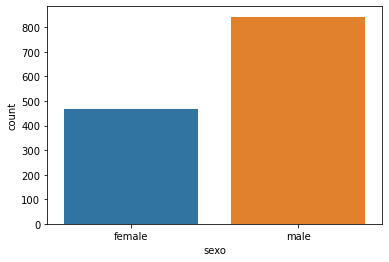

In [40]:
#Gráfico de barras tipo counterplot. Quantidade de pessoas que morreram
ax = sns.countplot(x=df1['sexo'])

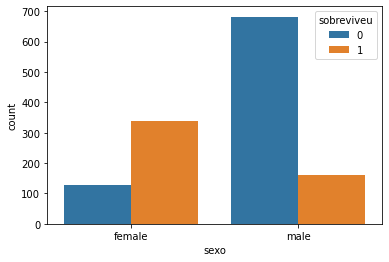

In [41]:
#Sexo x Sobrevivência e Mortes, por homens e mulheres
ax = sns.countplot(data=df1, x="sexo", hue="sobreviveu")

In [42]:
# Agrupando o embarque
group = df1.groupby(['embarque']).size()
group

embarque
24.0      2
C       270
Q       123
S       914
dtype: int64

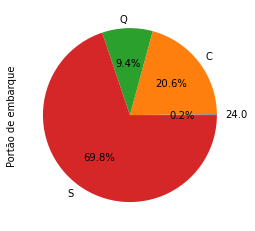

In [43]:
ax = group.plot.pie(autopct="%.1f%%", label = 'Portão de embarque')

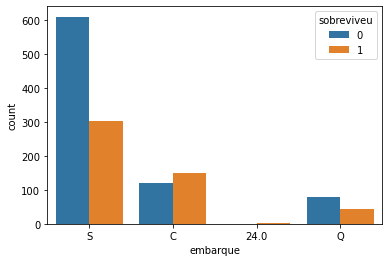

In [44]:
#Mortes x sobrevivência, por homens e mulheres
ax = sns.countplot(data=df1, x="embarque", hue="sobreviveu")

In [45]:
group = df1.groupby(['sobreviveu']).size()
group

sobreviveu
0    809
1    500
dtype: int64

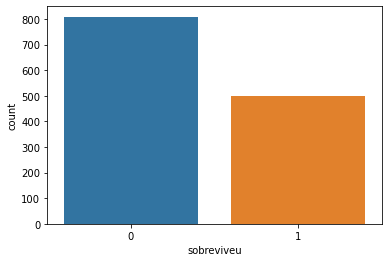

In [46]:
ax = sns.countplot(x=df1['sobreviveu'])

#### Importante: sobreviveu é a variável alvo(target)  e podemos observar que essa está desbalanceada. Mais tarde iremos balancear por diversas técnicas.

In [79]:
group = df1.groupby(['bilhete']).size()
group.max

<bound method NDFrame._add_numeric_operations.<locals>.max of bilhete
110152         3
110413         3
110465         2
110469         1
110489         1
              ..
W./C. 6608     5
W./C. 6609     1
W.E.P. 5734    2
W/C 14208      1
WE/P 5735      2
Length: 929, dtype: int64>

In [21]:
#!pip install wordcloud 

In [22]:
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

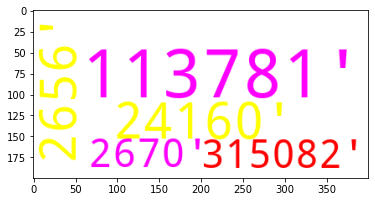

In [82]:
palavras = str(df1['bilhete'].values)
# Definição das cores que serão utilizadas na nuvem de palavras
mapa_cores = ListedColormap(['orange', 'green', 'red', 'magenta','blue','yellow'])
# Criação da nuvem de palavras, com no máximo 100 palavras e utilizando as stop words
nuvem = WordCloud(background_color = 'white',
                  colormap = mapa_cores,
                  stopwords = '',
                  max_words = 929)
# Criação e visualização da nuvem de palavras
nuvem.generate(palavras)
ax = plt.imshow(nuvem)

In [83]:
#excluir a coluna bilhete
df1.drop(['bilhete'],axis=1, inplace=True)
df1.head(1)

,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque
passenger_id,,,,,,,,
0,1,1,female,29.0,0,0,211.3375,S


### Ordinais - Depende de ordem
classe

In [92]:
group = df1.groupby(['classe']).size()
group

classe
1    323
2    277
3    709
dtype: int64

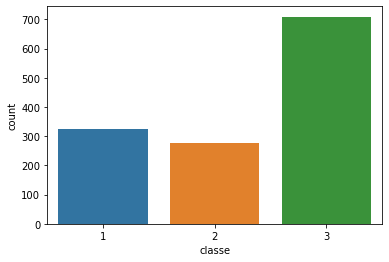

In [71]:
ax = sns.countplot(x=df1['classe'])

### Criandos histogramas para todos os atributos numéricos

In [106]:
#Obtedo os atributos apenas os númericos
#Discretos - Inteiros (# irmaos_conjuge,pais_filhos) e Contínuos - Campos com vírgula 
#(# idade, tarifa)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df1.select_dtypes(include=numerics)
df_numeric

,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa
passenger_id,,,,,,
0,1,1,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,0,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500
...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542
1305,3,0,3.0000,1,0,14.4542
1306,3,0,26.5000,0,0,7.2250


In [107]:
#Vamos remover as variáveis classe, sobreviveu e passenger_id.
df_numeric.drop(['classe'],axis=1, inplace=True)
df_numeric.drop(['sobreviveu'],axis=1, inplace=True)
atrib = df_numeric
atrib

,idade,irmaos_conjuge,pais_filhos,tarifa
passenger_id,,,,
0,29.0000,0,0,211.3375
1,0.9167,1,2,151.5500
2,2.0000,1,2,151.5500
3,30.0000,1,2,151.5500
4,25.0000,1,2,151.5500
...,...,...,...,...
1304,14.5000,1,0,14.4542
1305,3.0000,1,0,14.4542
1306,26.5000,0,0,7.2250


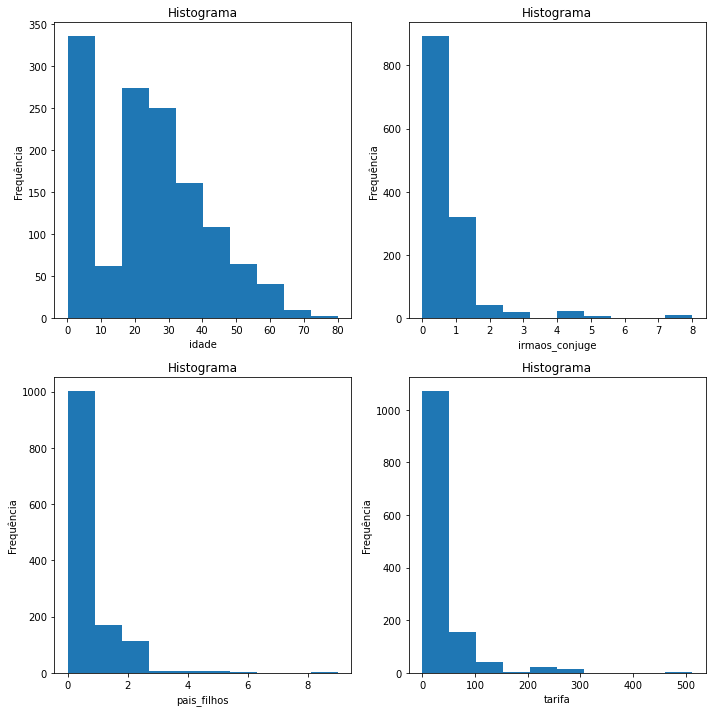

In [120]:
#Montar histogramas de todos
#5 figuras por linha 
f, ax = plt.subplots(2,2)
#Colocando lado a lado
ax = ax.flatten()
tam = len(atrib)

for column, posicao in zip(df_numeric, range(0, tam-1, 1)) :    
    ax[posicao].hist(df_numeric[column])
    ax[posicao].set_title('Histograma')
    ax[posicao].set_ylabel('Frequência')
    ax[posicao].set_xlabel(column)

plt.tight_layout()    
plt.rcParams['figure.figsize'] = (5,10)
plt.show()   

### Criandos histogramas para todos os atributos numéricos

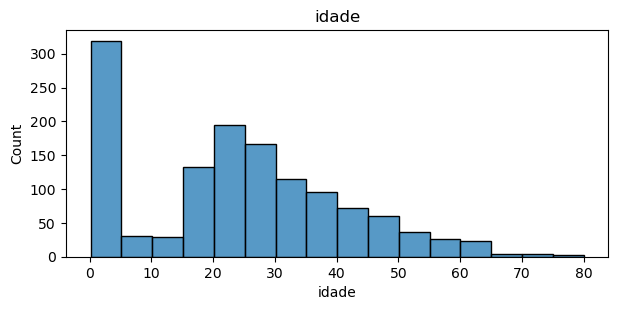

In [121]:
#Histograma individual
plt.figure(figsize=(7,3),dpi=100)
ax = sns.histplot(df['idade']).set_title('idade')

### Criandos boxplot para todos os atributos numéricos

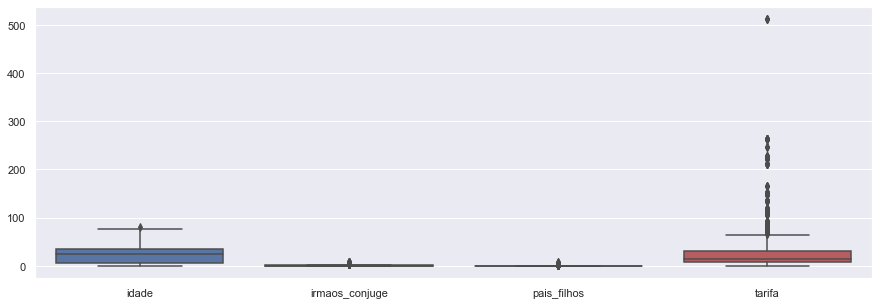

In [136]:
#boxplot = df_numeric.boxplot(grid=True,figsize=(10,5))
sns.set(rc={'figure.figsize': (15, 5)}) 
ax = sns.boxplot(data=df_numeric)

### Vamos fazer um a um

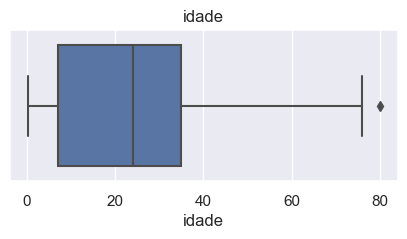

In [152]:
#Vamos fazer um a um idade
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df1['idade']).set_title('idade')

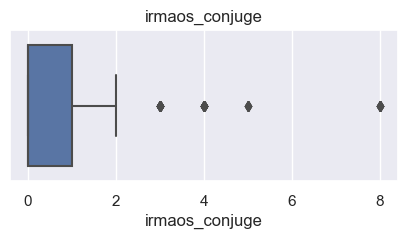

In [153]:
#irmaos_conjuge
#Vamos fazer um a um idade
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df1['irmaos_conjuge']).set_title('irmaos_conjuge')

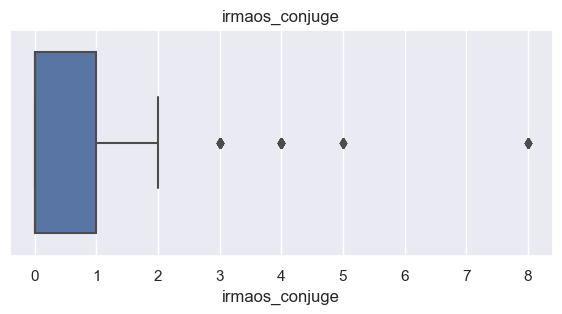

In [162]:
#pais_filhos
#Vamos fazer um a um idade
plt.figure(figsize=(7,3),dpi=100)
ax = sns.boxplot(df1['irmaos_conjuge']).set_title('irmaos_conjuge')

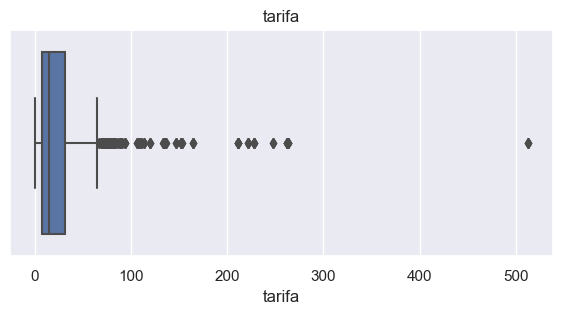

In [163]:
#tarifa
plt.figure(figsize=(7,3),dpi=100)
ax = sns.boxplot(df1['tarifa']).set_title('tarifa')

<AxesSubplot:xlabel='classe', ylabel='idade'>

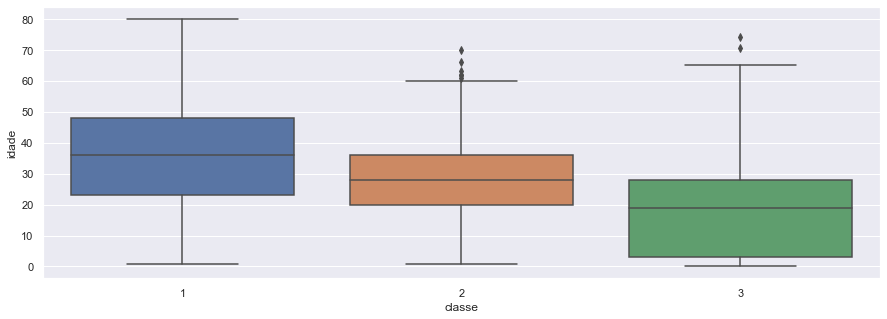

In [175]:
sns.boxplot(data=df1, x="classe", y="idade")

In [176]:
df1.describe()

,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,24.480265,0.498854,0.385027,33.282343
std,0.837836,0.486055,16.795167,1.041658,0.865560,51.741062
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,7.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


### Correlações

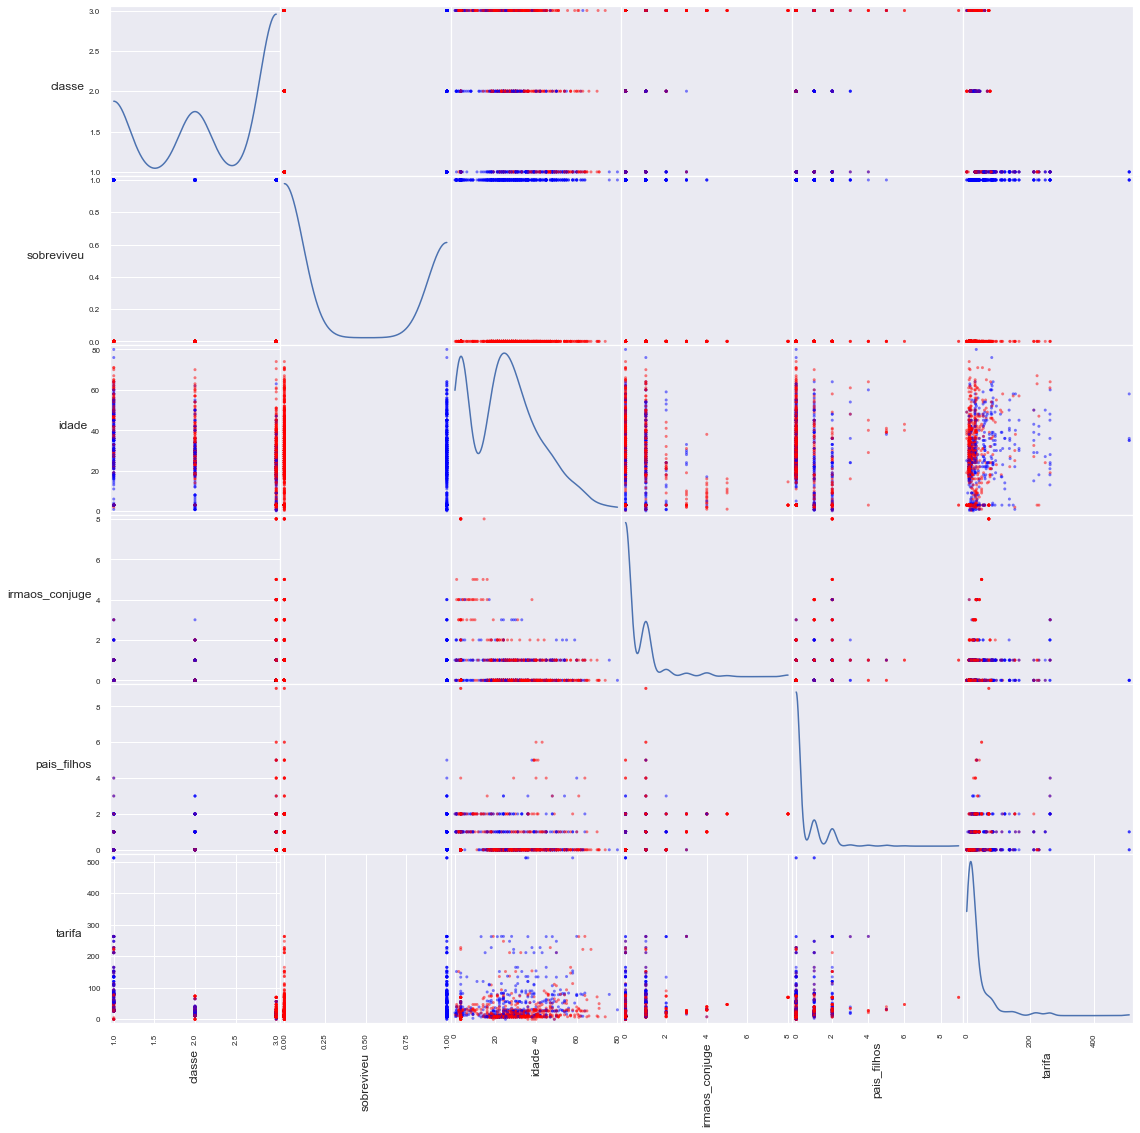

In [183]:
#Scatter Matriz
#criando um dicionario para mapear cada classe para uma cor 
classe_cor = {0 : 'red',1 : 'blue'}
#criando uma lista com as cores de cada exemplo
cores = [classe_cor[nome] for nome in df1.sobreviveu]
# gerando matriz de scatter plots
#pd.scatter_matrix(df_train, color=cores)
axes = pd.plotting.scatter_matrix(df1, diagonal='kde', color=cores,figsize=(16,16))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

NameError: name 'X' is not defined

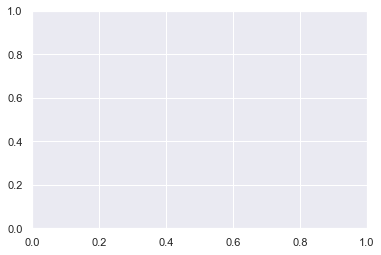

In [179]:
fig, ax = plt.subplots(figsize=(6, 4))
X.plot.scatter(
    x="age", y="fare", ax=ax, alpha=0.3
)
#fig.savefig("images/mlpr_0603.png", dpi=300)

In [33]:
X.age.corr(X.fare)

0.17719980495717755

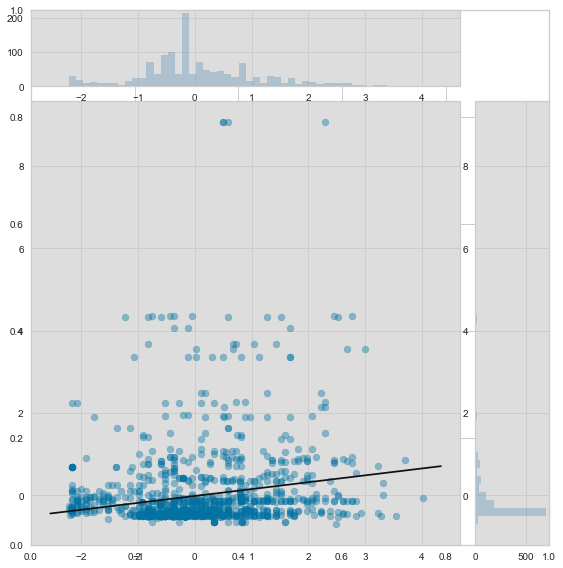

In [34]:
from yellowbrick.features import (
    JointPlotVisualizer,
)
fig, ax = plt.subplots(figsize=(6, 6))
jpv = JointPlotVisualizer(
    feature="age", target="fare"
)
jpv.fit(X["age"], X["fare"])
jpv.poof()
#fig.savefig("images/mlpr_0604.png", dpi=300)

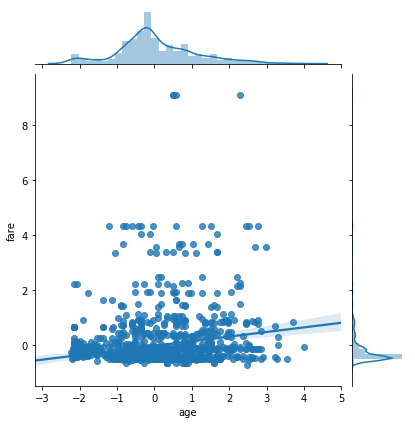

In [7]:
from seaborn import jointplot
new_df = X.copy()
new_df["target"] = y
p = jointplot(
    "age", "fare", data=new_df, kind="reg"
)
#p.fig.savefig("images/mlpr_0605.png", dpi=300)

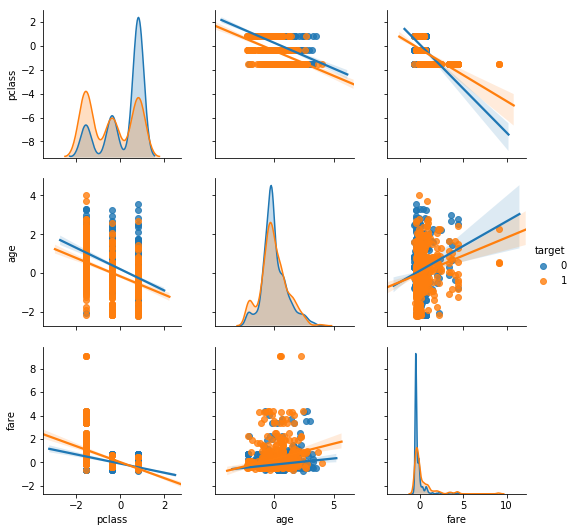

In [8]:
from seaborn import pairplot
new_df = X.copy()
new_df["target"] = y
vars = ["pclass", "age", "fare"]
p = pairplot(
    new_df, vars=vars, hue="target", kind="reg"
)
#p.fig.savefig("images/mlpr_0606.png", dpi=300)

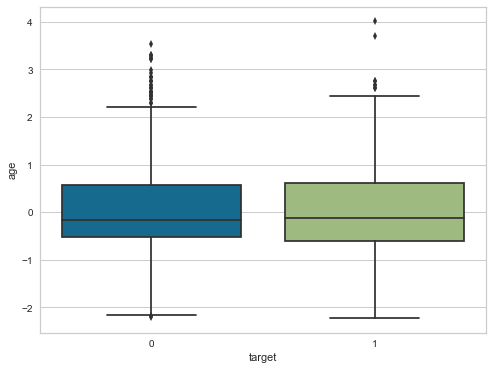

In [37]:
from seaborn import boxplot
fig, ax = plt.subplots(figsize=(8, 6))
new_df = X.copy()
new_df["target"] = y
boxplot(x="target", y="age", data=new_df)
#fig.savefig("images/mlpr_0607.png", dpi=300)

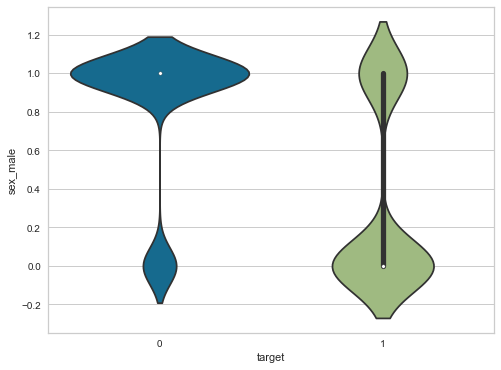

In [38]:
from seaborn import violinplot
fig, ax = plt.subplots(figsize=(8, 6))
new_df = X.copy()
new_df["target"] = y
violinplot(
    x="target", y="sex_male", data=new_df
)
#fig.savefig("images/mlpr_0608.png", dpi=300)

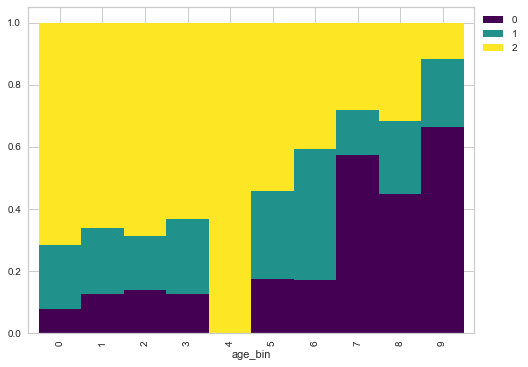

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
(
    X.assign(
        age_bin=pd.qcut(
            X.age, q=10, labels=False
        ),
        class_bin=pd.cut(
            X.pclass, bins=3, labels=False
        ),
    )
    .groupby(["age_bin", "class_bin"])
    .size()
    .unstack()
    .pipe(lambda df: df.div(df.sum(1), axis=0))
    .plot.bar(
        stacked=True,
        width=1,
        ax=ax,
        cmap="viridis",
    )
    .legend(bbox_to_anchor=(1, 1))
)
#fig.savefig(
#     "image/mlpr_0609.png",
#     dpi=300,
#     bbox_inches="tight",
# )

/Users/matt/.env/364/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


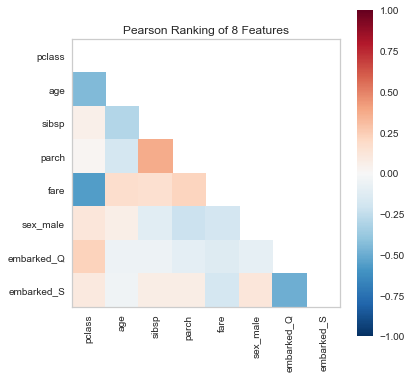

In [40]:
from yellowbrick.features import Rank2D
fig, ax = plt.subplots(figsize=(6, 6))
pcv = Rank2D(
    features=X.columns, algorithm="pearson"
)
pcv.fit(X, y)
pcv.transform(X)
pcv.poof()
# fig.savefig(
#     "images/mlpr_0610.png",
#     dpi=300,
#     bbox_inches="tight",
#)

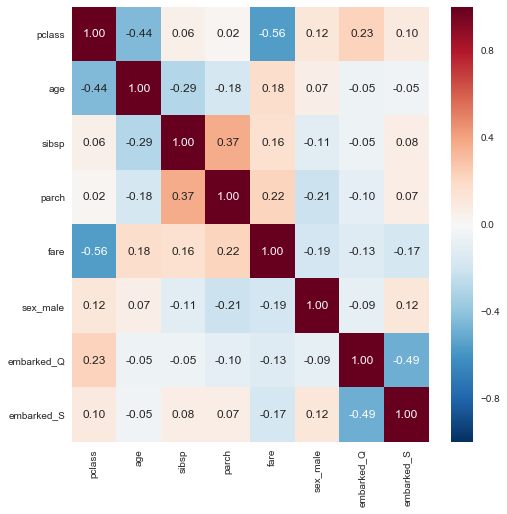

In [41]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(8, 8))
ax = heatmap(
    X.corr(),
    fmt=".2f",
    annot=True,
    ax=ax,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
)
# fig.savefig(
#     "images/mlpr_0611.png",
#     dpi=300,
#     bbox_inches="tight",
# )

In [42]:
X.corr().iloc[:, :2]

,pclass,age
pclass,1.000000,-0.439704
age,-0.439704,1.000000
sibsp,0.060832,-0.292056
parch,0.018322,-0.176447
fare,-0.558827,0.177200
sex_male,0.124617,0.065004
embarked_Q,0.230491,-0.053904
embarked_S,0.096335,-0.045361


In [54]:
def correlated_columns(df, threshold=0.95):
    return (
        df.corr()
        .pipe(
            lambda df1: pd.DataFrame(
                np.tril(df1, k=-1),
                columns=df.columns,
                index=df.columns,
            )
        )
        .stack()
        .rename("pearson")
        .pipe(
            lambda s: s[
                s.abs() > threshold
            ].reset_index()
        )
        .query("level_0 not in level_1")
    )
correlated_columns(X)

,level_0,level_1,pearson


In [58]:
>>> agg = (
...     df.groupby("cabin")
...     .agg("min,max,mean,sum".split(","))
...     .reset_index()
... )
>>> agg.columns = [
...     "_".join(c).strip("_")
...     for c in agg.columns.values
... ]
>>> agg_df = df.merge(agg, on="cabin")

In [61]:
c_df = correlated_columns(agg_df.select_dtypes('number'))
c_df.style.format({"pearson": "{:.2f}"})

,level_0,level_1,pearson
3,pclass_mean,pclass,1.00
4,pclass_mean,pclass_min,1.00
5,pclass_mean,pclass_max,1.00
6,sibsp_mean,sibsp_max,0.97
7,parch_mean,parch_min,0.95
8,parch_mean,parch_max,0.96
9,fare_mean,fare,0.95
10,fare_mean,fare_max,0.98
17,body_sum,body,1.00
18,body_sum,body_min,1.00


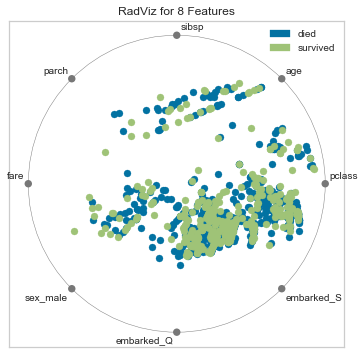

In [62]:
from yellowbrick.features import RadViz
fig, ax = plt.subplots(figsize=(6, 6))
rv = RadViz(
    classes=["died", "survived"],
    features=X.columns,
)
rv.fit(X, y)
_ = rv.transform(X)
rv.poof()
#fig.savefig("images/mlpr_0612.png", dpi=300)

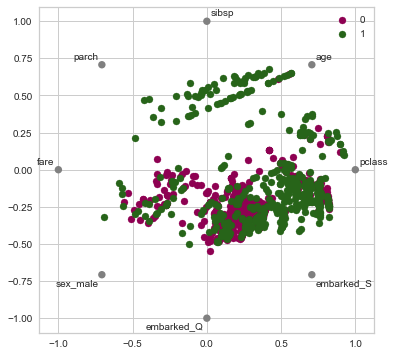

In [63]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(6, 6))
new_df = X.copy()
new_df["target"] = y
radviz(
    new_df, "target", ax=ax, colormap="PiYG"
)
#fig.savefig("images/mlpr_0613.png", dpi=300)

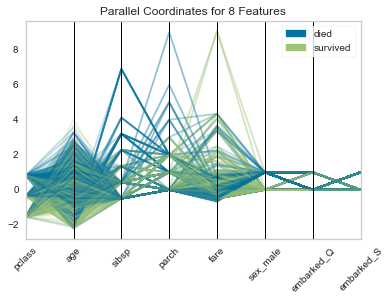

In [64]:
from yellowbrick.features import (
    ParallelCoordinates,
)
fig, ax = plt.subplots(figsize=(6, 4))
pc = ParallelCoordinates(
    classes=["died", "survived"],
    features=X.columns,
)
pc.fit(X, y)
pc.transform(X)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45
)
pc.poof()
#fig.savefig("images/mlpr_0614.png", dpi=300)

[Text(0,0,'pclass'),
 Text(0,0,'age'),
 Text(0,0,'sibsp'),
 Text(0,0,'parch'),
 Text(0,0,'fare'),
 Text(0,0,'sex_male'),
 Text(0,0,'embarked_Q'),
 Text(0,0,'embarked_S')]

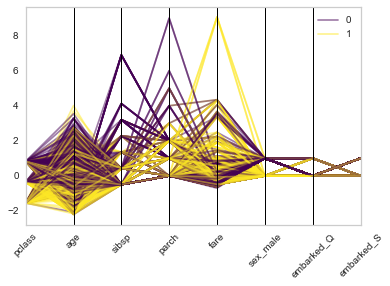

In [65]:
from pandas.plotting import (
    parallel_coordinates,
)
fig, ax = plt.subplots(figsize=(6, 4))
new_df = X.copy()
new_df["target"] = y
parallel_coordinates(
    new_df,
    "target",
    ax=ax,
    colormap="viridis",
    alpha=0.5,
)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45
)
# fig.savefig(
#     "images/mlpr_0615.png",
#     dpi=300,
#     bbox_inches="tight",
# )

### Referências

#### SEABORN. Disponível em:https://seaborn.pydata.org/generated/seaborn.countplot.html. Acesso em 29/09/2022.